# 生存分析(Survival Analysis)
**生存分析**は、生物の死や機械系の故障など、1つまたは複数の事象が起こるまでの予想される期間を分析するための統計の一分野です。

## 環境
 - Python 3.4.5
 - anaconda3-2.3.0

## 使用したパッケージ

 - [Survival analysis built on top of scikit-learn](https://github.com/sebp/scikit-survival)
 - [Survival analysis in Python http://lifelines.readthedocs.org](https://github.com/CamDavidsonPilon/lifelines)

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントを設定
font = {'family': 'IPAexGothic'}
mpl.rc('font', **font)

%matplotlib inline

In [2]:
from sksurv.datasets import load_veterans_lung_cancer

x, y = load_veterans_lung_cancer()

In [3]:
x.head()

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,'squamous',60.0,7.0,'no','standard'
1,64.0,'squamous',70.0,5.0,'yes','standard'
2,38.0,'squamous',60.0,3.0,'no','standard'
3,63.0,'squamous',60.0,9.0,'yes','standard'
4,65.0,'squamous',70.0,11.0,'yes','standard'


 - `Age_in_years`: 年齢
 - `Celltype`: 細胞の種類; `[squamous(扁平上皮), small cell, adeno(腺癌), large]`
 - `Karnofsky_score`: カルノフスキースコア(がん患者の日常活動を遂行する能力を計るための標準的な値.0~100)
 - `Months_from_Diagnosis`: 診断からの経過月数
 - `Prior_therapy`: 前に治療したかいなか; `[yes, no]`
 - `Treatment`: 肺癌治療のタイプ; `[standard, test drug]`

In [4]:
y

array([( True,   72.), ( True,  411.), ( True,  228.), ( True,  126.),
       ( True,  118.), ( True,   10.), ( True,   82.), ( True,  110.),
       ( True,  314.), (False,  100.), ( True,   42.), ( True,    8.),
       ( True,  144.), (False,   25.), ( True,   11.), ( True,   30.),
       ( True,  384.), ( True,    4.), ( True,   54.), ( True,   13.),
       (False,  123.), (False,   97.), ( True,  153.), ( True,   59.),
       ( True,  117.), ( True,   16.), ( True,  151.), ( True,   22.),
       ( True,   56.), ( True,   21.), ( True,   18.), ( True,  139.),
       ( True,   20.), ( True,   31.), ( True,   52.), ( True,  287.),
       ( True,   18.), ( True,   51.), ( True,  122.), ( True,   27.),
       ( True,   54.), ( True,    7.), ( True,   63.), ( True,  392.),
       ( True,   10.), ( True,    8.), ( True,   92.), ( True,   35.),
       ( True,  117.), ( True,  132.), ( True,   12.), ( True,  162.),
       ( True,    3.), ( True,   95.), ( True,  177.), ( True,  162.),
      

観測期間中に死亡した場合は`Status`が`True`になり、`False`の場合は右側打切りである。

(array([ 84.,  29.,  11.,   7.,   2.,   2.,   0.,   0.,   0.,   2.]),
 array([   1. ,  100.8,  200.6,  300.4,  400.2,  500. ,  599.8,  699.6,
         799.4,  899.2,  999. ]),
 <a list of 10 Patch objects>)

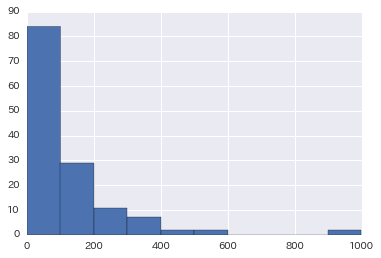

In [5]:
plt.hist(y['Survival_in_days'])

In [6]:
print(y[y['Status'] == False].shape[0])
print(y[y['Status'] == True].shape[0])

9
128


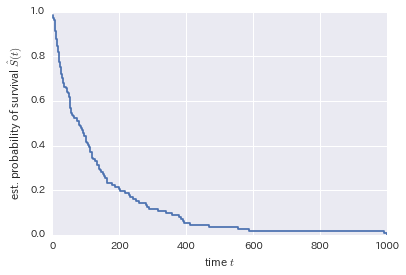

In [16]:
# scikit-survival
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(y['Status'], y['Survival_in_days'])

plt.step(time, survival_prob, where="post")
plt.ylim(0, 1)
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

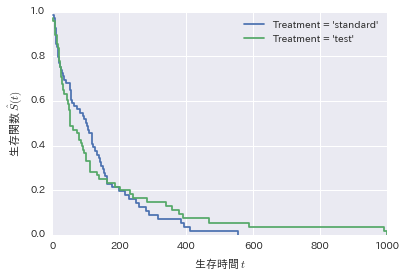

In [8]:
for treatment_type in x.Treatment.unique():
    target_indexs = x[x.Treatment == treatment_type].index
    time, survival_prob = kaplan_meier_estimator(
        y[target_indexs]['Status'], 
        y[target_indexs]['Survival_in_days']
    )
    plt.step(time, survival_prob, where="post", label='Treatment = {0}'.format(treatment_type))

plt.ylim(0, 1)
plt.ylabel("生存関数 $\hat{S}(t)$")
plt.xlabel("生存時間 $t$")
plt.legend()
plt.show()

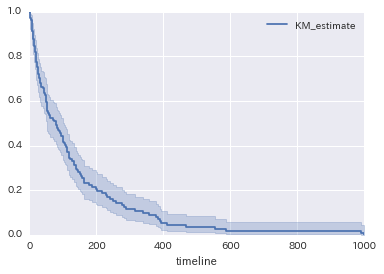

In [17]:
# lifelines
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(y['Survival_in_days'], event_observed=y['Status'])

kmf.plot()
plt.show()

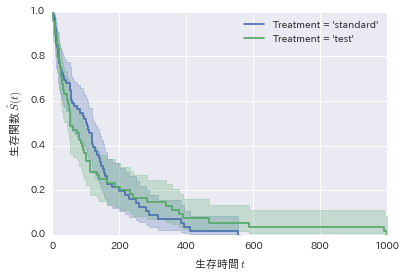

In [15]:
ax = None

for treatment_type in x.Treatment.unique():
    target_indexs = x[x.Treatment == treatment_type].index
    kmf = KaplanMeierFitter()
    kmf.fit(y[target_indexs]['Survival_in_days'], event_observed=y[target_indexs]['Status'], label='Treatment = {0}'.format(treatment_type))
    
    if ax is None:
        ax = kmf.plot()
    else:
        ax = kmf.plot(ax=ax)

plt.xlim(0, 1000)
plt.ylabel("生存関数 $\hat{S}(t)$")
plt.xlabel("生存時間 $t$")
plt.show()